In [32]:
import cv2
import os
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import pandas as pd

In [33]:
img = cv2.imread("Project9_pictures/book/08-38-04-747575.png")

In [34]:
img.shape

(224, 224, 3)

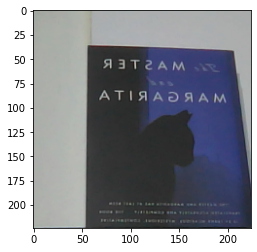

In [35]:
plt.imshow(img)

In [36]:
def readPictures():
    X = []
    y = []
    classes = ["book","coin","cup","cutlery","face","gesture","glass","nail_polish","pen","plant","plate","shoe"]
    base_path = 'Project9_pictures/'

    for i, target in enumerate(classes):
        files = os.listdir(base_path+target)
        for file in files: 
            # load the image
            current_path=base_path+target+"/"+file
            img = cv2.imread(current_path)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # convert it to an array
            #img_array = cv2.resize(img_gray,(28,28))
            # append the array to X
            X.append(img)
            # append the numeric target to y
            y.append(i)
            
    X = np.array(X)
    y = np.array(y)

    # shuffle the data
    shuffler = np.random.permutation(len(X))
    X = X[shuffler]
    y = y[shuffler]
    return X,y

In [37]:
X,y=readPictures()

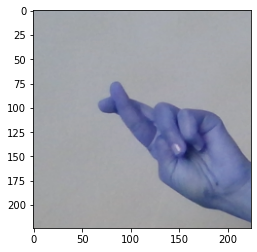

In [38]:
plt.imshow(X[0])

In [39]:
X.shape

(1279, 224, 224, 3)

In [40]:
y.shape

(1279,)

In [41]:
# Model / data parameters
num_classes = 12
input_shape = (224, 224, 3)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [44]:
X_train.shape, y_train.shape

((959, 224, 224, 3), (959,))

In [45]:
X_test.shape, y_test.shape

((320, 224, 224, 3), (320,))

#### Scale Images

In [46]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [47]:
X_train

array([[[[0.61960787, 0.6392157 , 0.6666667 ],
         [0.62352943, 0.6431373 , 0.67058825],
         [0.627451  , 0.6509804 , 0.6745098 ],
         ...,
         [0.6392157 , 0.654902  , 0.67058825],
         [0.654902  , 0.6666667 , 0.6901961 ],
         [0.654902  , 0.6666667 , 0.69411767]],

        [[0.61960787, 0.6392157 , 0.6666667 ],
         [0.62352943, 0.6431373 , 0.67058825],
         [0.6313726 , 0.654902  , 0.6784314 ],
         ...,
         [0.6392157 , 0.6509804 , 0.6784314 ],
         [0.64705884, 0.65882355, 0.68235296],
         [0.6509804 , 0.6627451 , 0.6862745 ]],

        [[0.62352943, 0.6431373 , 0.67058825],
         [0.62352943, 0.6431373 , 0.67058825],
         [0.627451  , 0.6509804 , 0.6745098 ],
         ...,
         [0.6392157 , 0.6509804 , 0.6784314 ],
         [0.6392157 , 0.6509804 , 0.6784314 ],
         [0.64705884, 0.65882355, 0.68235296]],

        ...,

        [[0.6313726 , 0.62352943, 0.627451  ],
         [0.627451  , 0.627451  , 0.627451  ]

#### One Hot Encode for y

In [48]:
# one hot encode
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [49]:
X_train.shape

(959, 224, 224, 3)

In [50]:
y_train.shape

(959, 12)

### Define the Keras Model

In [51]:
from tensorflow.keras import backend as K

K.clear_session()
# define the keras model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

#### Model Summary

In [52]:
# model summary table
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dropout (Dropout)           (None, 93312)             0

In [53]:
# define the batch size and number of epochs
batch_size = 16
epochs = 12

In [54]:
# complile and define eval metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# fit the model
history=model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/12
24/24 [==============================] - 18s 601ms/step - loss: 3.6896 - accuracy: 0.2021 - val_loss: 1.9781 - val_accuracy: 0.4583
Epoch 2/12
24/24 [==============================] - 13s 539ms/step - loss: 1.3045 - accuracy: 0.6597 - val_loss: 1.0183 - val_accuracy: 0.6823
Epoch 3/12
24/24 [==============================] - 13s 539ms/step - loss: 0.5161 - accuracy: 0.8592 - val_loss: 0.7707 - val_accuracy: 0.7865
Epoch 4/12
24/24 [==============================] - 13s 554ms/step - loss: 0.2611 - accuracy: 0.9205 - val_loss: 0.6241 - val_accuracy: 0.8125
Epoch 5/12
24/24 [==============================] - 13s 536ms/step - loss: 0.1502 - accuracy: 0.9609 - val_loss: 0.6642 - val_accuracy: 0.7917
Epoch 6/12
24/24 [==============================] - 14s 582ms/step - loss: 0.1060 - accuracy: 0.9726 - val_loss: 0.9010 - val_accuracy: 0.7500
Epoch 7/12
24/24 [==============================] - 15s 642ms/step - loss: 0.0513 - accuracy: 0.9896 - val_loss: 0.5496 - val_accuracy: 0.8594

## Evaluation

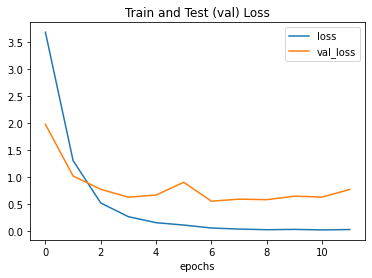

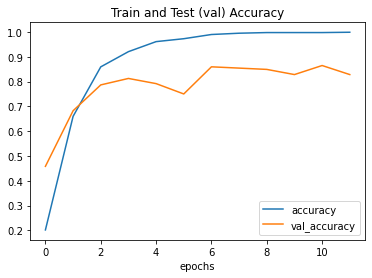

In [61]:
losses_accurs = pd.DataFrame(history.history)

losses_accurs[['loss', 'val_loss']].plot()
plt.gcf().set_facecolor('white')
plt.title('Train and Test (val) Loss')
plt.xlabel('epochs')
plt.show()

losses_accurs[['accuracy', 'val_accuracy']].plot()
plt.gcf().set_facecolor('white')
plt.title('Train and Test (val) Accuracy')
plt.xlabel('epochs')
plt.show()

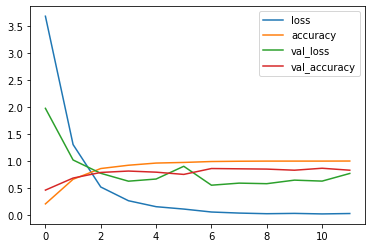

In [62]:
# Plot model accuracy and loss:
pd.DataFrame(history.history).plot()
plt.gcf().set_facecolor('white')

In [63]:
# evaluate the model and print the results
score = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Train loss: 0.16514632105827332
Train accuracy: 0.965589165687561


In [64]:
# evaluate the model and print the results
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5772076845169067
Test accuracy: 0.856249988079071


### Saving Model

In [65]:
# serialize model
model.save("models/model_color.h5")
print("Saved model to disk")

Saved model to disk


In [68]:
X[0].reshape(1,224,224,3)

array([[[[158, 163, 170],
         [159, 164, 171],
         [160, 166, 172],
         ...,
         [163, 167, 171],
         [167, 170, 176],
         [167, 170, 177]],

        [[158, 163, 170],
         [159, 164, 171],
         [161, 167, 173],
         ...,
         [163, 166, 173],
         [165, 168, 174],
         [166, 169, 175]],

        [[159, 164, 171],
         [159, 164, 171],
         [160, 166, 172],
         ...,
         [163, 166, 173],
         [163, 166, 173],
         [165, 168, 174]],

        ...,

        [[161, 159, 160],
         [160, 160, 160],
         [159, 160, 160],
         ...,
         [139, 137, 142],
         [139, 139, 143],
         [139, 140, 144]],

        [[162, 160, 159],
         [162, 160, 158],
         [159, 159, 156],
         ...,
         [141, 140, 143],
         [140, 140, 143],
         [139, 141, 143]],

        [[160, 160, 158],
         [158, 159, 157],
         [158, 159, 157],
         ...,
         [141, 140, 143],
        

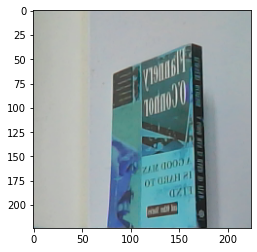

In [98]:
plt.imshow(X[11])

In [99]:
DResults=model.predict(X[11].reshape(1,224,224,3))
DResults

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [101]:
np.argmax(model.predict(X[11].reshape(1,224,224,3)))

0

In [94]:
DResults

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [83]:
DResults[0][3]

1.0